## ZiAngLi


## Question 1: Classification

## Set up the environment and load the dataset

In [101]:
import numpy as np
from numpy import loadtxt
X = loadtxt('cls_X.csv', delimiter=',')
y = loadtxt('cls_y.csv', delimiter=',')

## Q1.1 Split the data into training and test sets (20% for testing)

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state= 42)

note: random_state=42: a random number seed used to ensure that get the same random split every time run the code. It will get different training and test sets every time run the code without the seed, which may lead to differences in results.

## Q1.2 First classifier

#### Q1.2.1 Without optimising the hyperparameter(s).

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

svm_clf = SVC()

svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (before hyperparameter tuning): {test_accuracy}")

Test Accuracy (before hyperparameter tuning): 0.8875


note: process of this classifier: 1.Initialize the classifier 2.Train the classifier using the training data 3. Use the trained classifier to make predictions and calculate test set accuracy. Here are the details

1. SVC() creates an instance of a support vector machine (SVM) classifier with default set of hyperparameter values .


2. fit(X_train, y_train) fits the training set , to be percise,  uses the training data to train the SVM classifier.


3. clf.predict(X_test) uses the model to predict the test set (X_test) and obtains the prediction result y_pred.
Besides, use the accuracy_score function to calculate the accuracy of the model on the test set, which means, the degree of match between the labels predicted by the model and the actual labels.

#### Q1.2.2 Optimise the hyperparameter(s) with the same machine learning method above.

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Define the parameter
param_grid_optimized = {
    'svc__C': [0.1, 1, 5, 7.19,7.25,],
    'svc__gamma': [ 0.1, 1, 10],
    'svc__kernel': ['rbf']
}

# Grid search
grid_search_optimized = GridSearchCV(pipeline, param_grid_optimized, cv=5, scoring='accuracy')
grid_search_optimized.fit(X_train, y_train)

best_params_optimized = grid_search_optimized.best_params_
print(f"Best Hyperparameters after optimization: {best_params_optimized}")

y_pred_optimized = grid_search_optimized.predict(X_test)
test_accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Test Accuracy using optimized hyperparameters: {test_accuracy_optimized}")


Best Hyperparameters after optimization: {'svc__C': 7.19, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Test Accuracy using optimized hyperparameters: 0.925


note: process of this part: 1.Create a Pipeline 2.Define the hyperparametric grid 3.Perform a grid search & Outputs the best hyperparameters 4.Use the optimised model for prediction and evaluation:

1. To simplified workflow,Pipeline is a tool that performs a series of steps  includes the steps StandardScaler() (for feature scaling) and SVC() (Support Vector Machine Classifier).


2. param_grid_optimized defines the hyperparameters to be tuned in the grid search, such as 'C' and 'gamma'. These hyperparameters are used to fine-tune the support vector machine model.


3. GridSearchCV is a tool for performing cross-validation on a given parameter grid.  cv=5 (5 fold cross-validation) and scoring='accuracy' (use accuracy as scoring metric) are specified.After that，use fit(x_train, y_train) Fit the training data and find the best hyperparameter combination in the parameter grid.


4. y_pred_optimized = grid_search_optimized.predict(X_test) meas : predicts the test set using the optimised model.Finally, use accuracy_score(y_test, y_pred_optimised)  to calculate the accuracy on the test set using the optimized model.

The logic of optimising is to create a Pipeline which containing a data preprocessing step and a model training step, and to use a grid search to find the best combination of hyperparameters.The performance of the optimised model on the test set is then evaluated.The grid search cross-validates each hyperparameter and returns a result grid in which each element represents a hyperparameter combination and a corresponding model score. The optimal hyperparameter combination can be picked based on the score. For the exact parameters, the best parameters are observed, and the dichotomy is used to continuously find the better values.

## Q1.3 Second classifier

#### Q1.3.1 Without optimising the hyperparameter(s).

In [103]:
# write your code below to replace the ellipsis "..."
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Test Accuracy for RandomForestClassifier (before hyperparameter optimising): {test_accuracy_rf}")

Test Accuracy for RandomForestClassifier (before hyperparameter optimising): 0.8375


note: same logical with the previous one, but here i use RandomForest.

#### Q1.3.2 Optimise the hyperparameter(s) with the same machine learning method above.

In [107]:
from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')  
# X_train_cleaned = imputer.fit_transform(X_train)
# X_test_cleaned = imputer.transform(X_test)


# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


note: Initially i want to use  "mean" to replace thr NaN,but i didnt find any wrong value after i inspect the dataset,so i just use Feature Scaling, which scales features with mean 0 and variance 1 to make the distribution of individual features relatively consistent.

In [109]:
from sklearn.model_selection import RandomizedSearchCV

# parameter space
param_grid_rf = {
    'rf__n_estimators': [10, 50, 100, 200],
    'rf__max_depth': [None, 5, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10]
}

# RandomizedSearch
random_search_rf = RandomizedSearchCV(pipeline, param_distributions=param_grid_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train_scaled, y_train)

best_params_rf_random = random_search_rf.best_params_
print(f"Best Hyperparameters for RandomForestClassifier (Randomized Search): {best_params_rf_random}")

y_pred_rf_tuned_random = random_search_rf.predict(X_test_scaled)
test_accuracy_rf_tuned_random = accuracy_score(y_test, y_pred_rf_tuned_random)
print(f"Test Accuracy for RandomForestClassifier (after hyperparameter optimising with Randomized Search): {test_accuracy_rf_tuned_random}")


Best Hyperparameters for RandomForestClassifier (Randomized Search): {'rf__n_estimators': 10, 'rf__min_samples_split': 2, 'rf__max_depth': 20}
Test Accuracy for RandomForestClassifier (after hyperparameter optimising with Randomized Search): 0.875


note: The same logic as the previous report, but here I use both random search and grid search for both cases, the difference between the two cases is the parameter range, so for larger ranges I use random search, and for smaller ranges I use grid search to find the best parameters. Also the logic of both search methods is similar.

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


# Create a pipeline 
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

# Define the parameter grid
param_grid_rf = {
    'rf__n_estimators': [10, 50, 100, 200],
    'rf__max_depth': [None, 5, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10]
}


# Grid search 
grid_search_rf = GridSearchCV(pipeline, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

best_params_rf = grid_search_rf.best_params_
print(f"Best Hyperparameters for RandomForestClassifier: {best_params_rf}")

y_pred_rf_tuned = grid_search_rf.predict(X_test_scaled)
test_accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(f"Test Accuracy for RandomForestClassifier (after hyperparameter optimising): {test_accuracy_rf_tuned}")


Best Hyperparameters for RandomForestClassifier: {'rf__max_depth': 30, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Test Accuracy for RandomForestClassifier (after hyperparameter optimising): 0.85


note: same logical with the previous one, but for RandomForest:

1. 'n_estimators': the number of trees in the random forest. Larger values usually increase the complexity of the model and help to improve its performance, but may also increase the risk of overfitting.

2. 'max_depth': limits the maximum depth of the tree. A deeper tree can better fit the training data. Setting it to None means that the depth of the tree is not limited, in addition to log2, etc.

3. 'min_samples_split': the minimum number of samples a node needs before splitting. If the number of samples for a node is less than this value, the split will not continue. Increasing this value helps prevent the model from learning noise and reduces the risk of overfitting.

## Q1.4 Show the precision, recall, f1 score and confusion matrix on the best of the two classifiers

Metrics for SVM Classifier:
Precision: 0.9130434782608695
Recall: 0.9545454545454546
F1 Score: 0.9333333333333332
Confusion Matrix:
[[32  4]
 [ 2 42]]


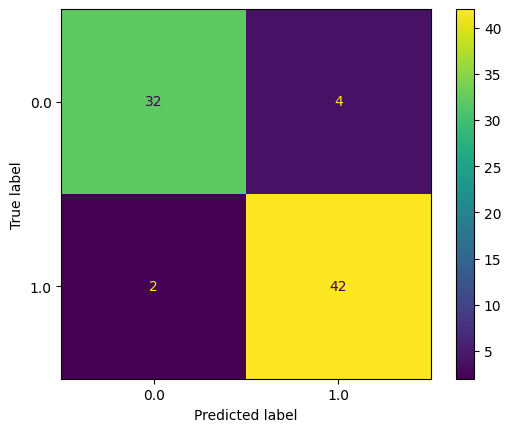


Metrics for RandomForest Classifier:
Precision: 0.7307692307692307
Recall: 0.8636363636363636
F1 Score: 0.7916666666666666
[[22 14]
 [ 6 38]]


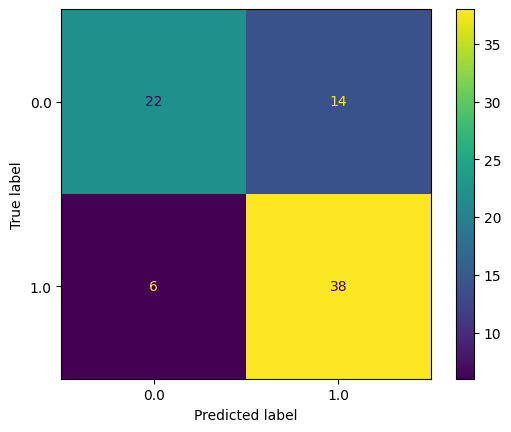

In [111]:
# write your code below to replace the ellipsis "..."
# For SVM Classifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predictions
y_pred_svm = grid_search_optimized.predict(X_test)

# Calculate
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Confusion Matrix
print("Metrics for SVM Classifier:")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)

# Figure
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
display.plot()
plt.show()


# For RandomForest Classifier
# Predictions
y_pred_rf = grid_search_rf.predict(X_test)

# Calculate
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nMetrics for RandomForest Classifier:")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
# print("Confusion Matrix:")
# print(conf_matrix_rf)

cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

#Figure
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
display.plot()
plt.show()

note: Use below function to calculate the norm of each models.
precision_score(y_test, y_pred_rf)
recall_score(y_test, y_pred_rf)
f1_score(y_test, y_pred_rf)
confusion_matrix(y_test, y_pred_rf)
To summarise: for the first part, SVM seems to perform better than RandomForest.

---

## Question 2: Regression 




## Set up the environment

In [112]:
import numpy as np
from sklearn.model_selection import train_test_split

## Read in the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = np.loadtxt('/content/drive/MyDrive/data/data.csv', delimiter=',')
print(data)

In [113]:
data = np.loadtxt('data.csv', delimiter=',')
print(data)

[[1.00000000e+00 9.00000000e+00 2.57259990e+00 2.49788633e+02]
 [1.00000000e+00 5.00000000e+00 9.21413366e+00 5.04502032e+02]
 [1.00000000e+00 1.70000000e+01 7.12330090e+00 1.33580225e+03]
 ...
 [5.00000000e+00 3.10000000e+01 6.80121067e+00 3.15979690e+03]
 [5.00000000e+00 1.00000000e+01 4.14995662e+00 6.21315789e+02]
 [5.00000000e+00 9.00000000e+00 9.61878173e+00 1.30105857e+03]]


report: I choose to run on my laptop.

## Q2.1 Split the data into X and y

X is the first three columns

y is the last column

In [114]:
# your answer here
# Split the data into X and y
X = data[:, :3]
y = data[:, -1]

## Q2.2 Create the Train and Test datasets

20% of the data is kept back for testing

In [115]:
# your answer here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (800, 3), y_train shape: (800,)
X_test shape: (200, 3), y_test shape: (200,)


note: Meaning of shape function: confirm that the results of the dataset segmentation are as expected by printing out their shapes.

## Q2.3 TWO Regression approaches on the dataset

In each case report the R^2 value against the test data.

Q2.3.1 Regression approach 1

In [117]:
# your answer here

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create and Fit LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

#Prediction
y_pred_linear = linear_reg.predict(X_test)

# R²
r2_linear = r2_score(y_test, y_pred_linear)
print(f"R² score for Linear Regression: {r2_linear}")


R² score for Linear Regression: 0.8625374681259913


note: Prcoess of LinearRegression: 1. Creates and fits a linear regression model 2.Model prediction & Calculate the R² score

1. Creates a linear regression model (ADDITIONAL: The basic form of a linear regression model is a linear equation that predicts the value of the dependent variable by a linear combination of the independent variables).
Trains the linear regression model using the training set X_train and the corresponding target value y_train.

2. Predict the test set X_test and get the prediction result y_pred_linear.
Use the r2_score function to calcuate the R² score.

Q2.3.2 Regression approach 2

In [118]:
# your answer here
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create  Neural Network Regression
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) 
])

# Compile
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

y_pred_nn = model.predict(X_test)

r2_nn = r2_score(y_test, y_pred_nn)
print(f"R² score for Neural Network Regression: {r2_nn}")


7/7 [==============================] - 0s 835us/step
R² score for Neural Network Regression: 0.8172921655215314


report: Same logic as linear regression, but different in creation.
Create a neural network model:
Neural networks are created using Keras' Sequential model. In this creation method, the neural network model can be built layer by layer, with each layer passed to the Sequential constructor through a list of Sequential objects. This approach is suitable for sequentially stacked neural networks, where the model is built sequentially layer by layer. Each layer uses its output as input for the next layer. This way of creation is more intuitive and clearly shows the structure and order of the model.

For each function which mentioned before, here are explainations:

Sequential(): create a Sequential model object model.
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))): add a hidden layer with 64 neurons and a ReLU activation function to the model, and specify the shape of the input data.
model.add(Dense(32, activation='relu')): adds a second hidden layer with 32 neurons and a ReLU activation function.
model.add(Dense(1)): add an output layer with only one node since this is a regression problem.
Compile the model:
model.compile(optimizer='adam', loss='mean_squared_error'): compiles the model using the Adam optimiser and specifies the loss function as the mean square error (MSE).

## Q2.4 Optimise the hyperparameters

Q2.4.1 Search for the best hyperparameters

In [119]:
from bayes_opt import BayesianOptimization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_nn_model(neurons, hidden_layers):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_dim=X_train.shape[1]))  

    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))

    model.add(Dense(1, activation='linear'))  

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae']) 

    return model

# Function to be optimized 
def nn_cv(neurons, hidden_layers, batch_size):

    model = create_nn_model(neurons=int(neurons), hidden_layers=int(hidden_layers))

    model.fit(X_train, y_train, epochs=50, batch_size=int(batch_size), verbose=0)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    return r2


# Hyperparameters for Bayesian optimization
param_bounds = {
    'neurons': (32, 128),
    'hidden_layers': (1, 3),
    'batch_size': (16, 64)
}

# Create the BayesianOptimization object
bayes_opt = BayesianOptimization(f=nn_cv, pbounds=param_bounds, random_state=42)

# Perform optimization
bayes_opt.maximize(init_points=10, n_iter=50)

print(f"Best R² score: {bayes_opt.max['target']}")
print(f"Best Parameters: {bayes_opt.max['params']}")


|   iter    |  target   | batch_... | hidden... |  neurons  |
-------------------------------------------------------------
7/7 [==============================] - 0s 834us/step
| 1         | 0.9303    | 33.98     | 2.901     | 102.3     |
7/7 [==============================] - 0s 1ms/step
| 2         | 0.4678    | 44.74     | 1.312     | 46.98     |
7/7 [==============================] - 0s 1ms/step
| 3         | 0.9535    | 18.79     | 2.732     | 89.71     |
7/7 [==============================] - 0s 668us/step
| 4         | 0.5812    | 49.99     | 1.041     | 125.1     |
7/7 [==============================] - 0s 1ms/step
| 5         | 0.2826    | 55.96     | 1.425     | 49.46     |
7/7 [==============================] - 0s 667us/step
| 6         | 0.6353    | 24.8      | 1.608     | 82.38     |
7/7 [==============================] - 0s 834us/step
| 7         | 0.6065    | 36.73     | 1.582     | 90.74     |
7/7 [==============================] - 0s 843us/step
| 8         | 0.602     

note: Process of this optimising: 1.Create a neural network model 2.Create the optimisation objective function 3.Set the hyperparameter search space 4.Perform Bayesian optimisation. 

1. Create with the previous logic. 

2. In the function,  first created using create_nn_model create the neural network model , then trained and  predicted the model. Computed R² score as an evaluation metric. This function is used for next process: Bayesian optimisation.

3.  defines the hyperparameter space to be searched. This includes the number of neurons (between 32 and 128), the number of hidden layers hidden_layers (between 1 and 3), and the batch size batch_size (between 16 and 64).

4. Created a BayesianOptimization object, to which the optimisation objective function nn_cv and the hyperparameter search space param_bounds are passed.
bayes_opt.maximize(init_points=10, n_iter=50): performs Bayesian Optimisation with 10 initialization point searches and 50 iterations of optimization search.

Q2.4.2 Output the best hyperparameters found

In [120]:
# your answer here
best_hyperparameters = bayes_opt.max['params']
print(f"Best hyperparameters found: {best_hyperparameters}")


Best hyperparameters found: {'batch_size': 19.916436332492992, 'hidden_layers': 3.0, 'neurons': 116.00088416309974}


Q2.4.3 Show the results for the best model

In [121]:
best_neurons = int(best_hyperparameters['neurons'])
best_hidden_layers = int(best_hyperparameters['hidden_layers'])
best_batch_size = int(best_hyperparameters['batch_size'])

best_model = create_nn_model(neurons=best_neurons, hidden_layers=best_hidden_layers)
best_model.fit(X_train, y_train, epochs=50, batch_size=best_batch_size, verbose=0)

y_pred_best_model = best_model.predict(X_test)
#  R² 
r2_best_model = r2_score(y_test, y_pred_best_model)
print(f"R² score for Best Neural Network Regression Model: {r2_best_model}")


7/7 [==============================] - 0s 1ms/step
R² score for Best Neural Network Regression Model: 0.9942689133149905


---
## Question 3: Deep Learning

Q3.1 For MNIST dataset, a deep learning model is implemented with 3 hidden layers with layer size: 128, 256, 50.


In [122]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.datasets import mnist
import keras.utils as utils

batch_size = 128
nb_classes = 10
im_dim = 784 # the total pixel number
nb_epoch = 2

In [123]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, im_dim)
X_test = X_test.reshape(10000, im_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

In [125]:
# Write down your code about MLP model for question Q3.1 here
# you should call your model 'model'

# Build the neural network model
model = Sequential()

# Add the first hidden layer with 128 neurons and ReLU activation
model.add(Dense(128, input_shape=(im_dim,)))
model.add(Activation('relu'))

#256
model.add(Dense(256))
model.add(Activation('relu'))

# 50
model.add(Dense(50))
model.add(Activation('relu'))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add the output layer with 10 neurons (since there are 10 classes in MNIST) and softmax activation
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, validation_data=(X_test, Y_test) , verbose=1)

# Evaluate the model
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
469/469 [==============================] - 1s 2ms/step - loss: 0.4623 - accuracy: 0.8672 - val_loss: 0.1586 - val_accuracy: 0.9502
Epoch 2/2
469/469 [==============================] - 1s 2ms/step - loss: 0.1793 - accuracy: 0.9526 - val_loss: 0.1101 - val_accuracy: 0.9660
Test loss: 0.11011000722646713
Test accuracy: 0.9660000205039978


note: 

Creating the neural network model
Sequential() initialises the neural network model as a sequence of layers.
Dense layer is used for the fully connected layers in the neural network.
Activation('relu') sets the Modified Linear Unit (ReLU) activation function for the hidden layer, introducing nonlinearity.

The neural network architecture consists of:
Input layer: implicitly defined based on the shape of the input data.
Three hidden layers, with 128, 256 and 50 neurons respectively, as required by the question, all using the ReLU activation function.
A Dropout layer to prevent overfitting, with a dropout rate of 0.5.
Output layer: with the same number of neurons as the number of categories in the MNIST dataset (10 in this case), using a softmax activation function for multi-category classification.

Model compilation:
model.compile() configures how the model is trained, specifying the loss function ('categorical_crossentropy'), optimiser ('adam') and evaluation metrics ('accuracy').
Train the model:

fit() uses the training data (X_train and Y_train) specifying the batch size, number of iterations and validation data (X_test and Y_test) to train the model.


Add code to output your network structure

In [126]:
# your code here
model.summary()

Model: "sequential_144"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_412 (Dense)           (None, 128)               100480    
                                                                 
 activation_12 (Activation)  (None, 128)               0         
                                                                 
 dense_413 (Dense)           (None, 256)               33024     
                                                                 
 activation_13 (Activation)  (None, 256)               0         
                                                                 
 dense_414 (Dense)           (None, 50)                12850     
                                                                 
 activation_14 (Activation)  (None, 50)                0         
                                                                 
 dropout_6 (Dropout)         (None, 50)             

note: Data above is summary information for a neural network model

Train the model for just two epochs to show it works. All code provided - just run.

In [127]:
# Train
history = model.fit(X_train, Y_train, epochs=nb_epoch,
                    validation_split = 0.2,
                    batch_size=batch_size, verbose=1)

# Evaluate
evaluation = model.evaluate(X_test, Y_test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

Epoch 1/2
375/375 [==============================] - 1s 2ms/step - loss: 0.1310 - accuracy: 0.9654 - val_loss: 0.0834 - val_accuracy: 0.9752
Epoch 2/2
313/313 [==============================] - 0s 797us/step - loss: 0.1081 - accuracy: 0.9711
Summary: Loss over the test dataset: 0.11, Accuracy: 0.97


note: train and evaluate the model

Q 3.2 For MNIST dataset, a CNN model is implemented with only one 2D CNN layer as the hidden layer.

In [129]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 2

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# input image dimensions
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


note: This part can be deviede into four parts:
1. Load the MNIST dataset

The MNIST dataset was loaded using Keras' mnist.load_data().
The training and test images were reshaped to adapt them to the input shape requirements of the CNN model.

2. Data preprocessing

Converted the pixel values from integer to floating point and performed normalisation (dividing the pixel values by 255) to scale the pixel values to between 0 and 1.

3. Converting category labels:

Used keras.utils.to_categorical to convert category labels into one-hot encoded form for training and evaluation with the model.

4. Build the CNN model:

A 2D convolutional layer (Conv2D) is included as a hidden layer.
No explicit flattening operation (Flatten) is performed, as a global average pooling layer is used next to avoid explicit flattening operations.
A Flatten layer is used to flatten the output of the convolutional layer in order to connect it to a fully connected layer.
Finally there is a fully connected output layer.

In [148]:

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='RMSprop', metrics=['accuracy'])

note: logical of this 

Building CNN models:

Keras' Sequential model was used to build the network.
A 2D convolutional layer (Conv2D) containing 32 convolutional kernels each of 3x3 size was added and ReLU was used as activation function. This layer receives the shape of the input image (img_rows, img_cols, 1), where the last dimension represents the number of channels (1 for a single-channel greyscale image).
A MaxPooling2D layer was added to perform pooling operations using a 2x2 pooling window to reduce the number of parameters and computation.
A Flatten layer was added to flatten the output of the convolutional layer to connect to the fully connected layer.
A fully connected hidden layer (Dense) containing 128 neurons and using the ReLU activation function was added.
To prevent overfitting, a Dropout layer was added after the hidden layer with the dropout rate set to 0.5.
The output layer is a fully connected layer with 10 neurons (corresponding to 10 categories) and uses a softmax activation function to output the probability distribution of the classification predictions.

Model Compilation and Training:
The model was optimised using cross entropy as a loss function (categorical_crossentropy) and Adadelta optimiser.
The model was trained through model.fit using training sets (x_train and y_train) and validated using validation sets (x_test and y_test).


network structure

In [134]:
model.summary()

Model: "sequential_147"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_420 (Dense)           (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
______________

Two epochs to demonstrate that the network does work.

In [149]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
              verbose=1, shuffle=True,
              validation_split = 0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (score[0], score[1]))

Epoch 1/2
375/375 [==============================] - 2s 6ms/step - loss: 0.4001 - accuracy: 0.8893 - val_loss: 0.2076 - val_accuracy: 0.9413
Epoch 2/2
375/375 [==============================] - 2s 6ms/step - loss: 0.1729 - accuracy: 0.9507 - val_loss: 0.1282 - val_accuracy: 0.9660
Summary: Loss over the test dataset: 0.12, Accuracy: 0.97


---
---
---
# Mini-project: Text dataset 

Twitter sentiment analysis refers to the automated analysis of textual data on Twitter to identify and extract users' positive, negative, or neutral emotions towards specific topics, events, or products. With social media becoming an indispensable part of people's daily lives, the massive amount of information on Twitter provides a rich data source for studying public emotions. Emotion analysis not only helps brands monitor their online reputation, but also helps government agencies and businesses understand the public's emotional reactions to specific policies or products.


Each sample in the dataset represents a tweet. Each tweet has a sentiment label (Positive, Negative, Neutral).


# Preprocessing

**BeforeStart**

As far as I understand, the general process for machine learning involves analyzing data first, then comparing different models to choose the best one.

As a beginner in this domain, I prefer to concentrate more on familiarizing myself with various models. Therefore, in my mini-project, I aim to utilize three different models to strengthen my understanding.


In [193]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from sklearn.utils.class_weight import compute_sample_weight
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv1D, GlobalMaxPooling1D, Dropout, Flatten
from sklearn.metrics import make_scorer
from scikeras.wrappers import KerasClassifier

In [134]:
# Goggle colab
# train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tweets_train (2) (1).csv')
# test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tweets_test (1) (2) (2).csv', encoding='ISO-8859-1')
# sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tweets_dev (1).csv')

# Read datasets local
train = pd.read_csv('Tweets_train (2) (1).csv')
test = pd.read_csv('Tweets_test (1) (2) (2).csv', encoding='ISO-8859-1')
dev = pd.read_csv('Tweets_dev (1).csv')

Report: 
i choose local one

In [137]:
sentiments_train = train['airline_sentiment']
sentiments_test = test['airline_sentiment']
sentiments_sub = dev['airline_sentiment']


train_counts = sentiments_train.value_counts()
test_counts = sentiments_test.value_counts()
sub_counts = sentiments_sub.value_counts()


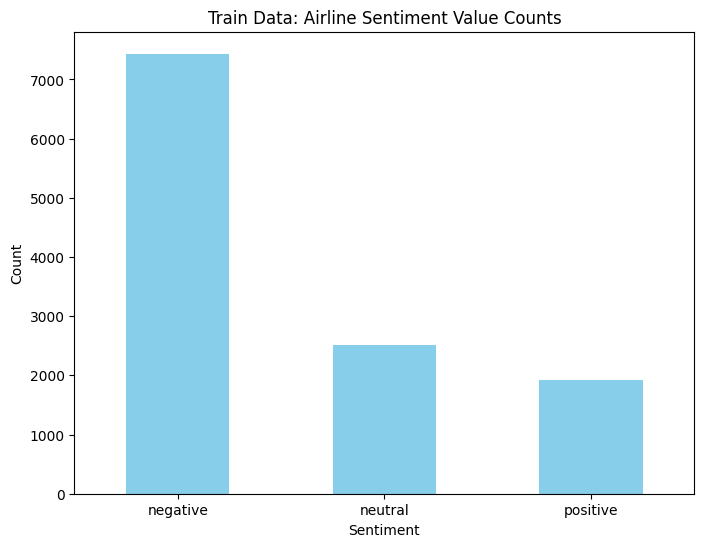

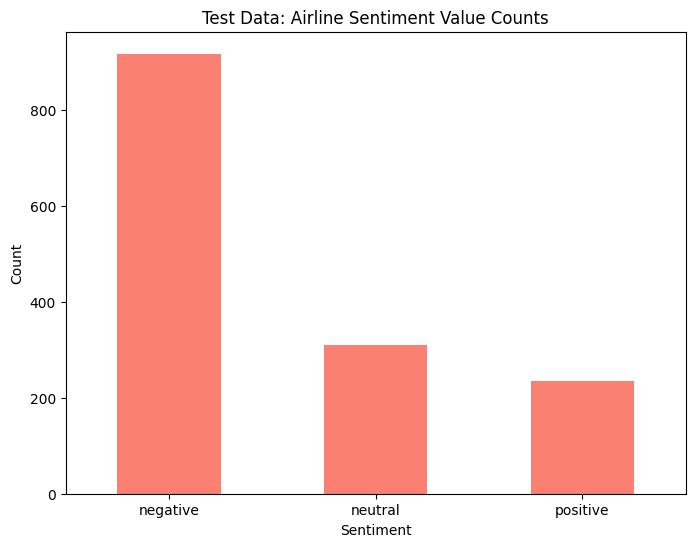

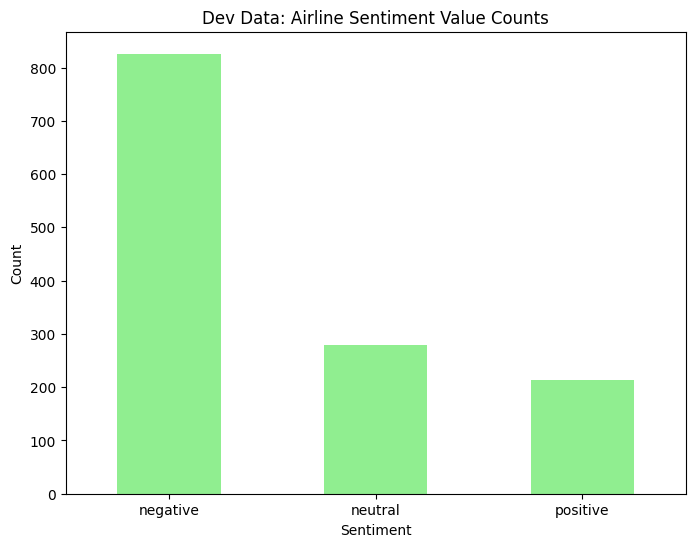

In [136]:
import matplotlib.pyplot as plt

# Your code to get value counts



plt.figure(figsize=(8, 6))
train_counts.plot(kind='bar', color='skyblue')
plt.title('Train Data: Airline Sentiment Value Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.show()


plt.figure(figsize=(8, 6))
test_counts.plot(kind='bar', color='salmon')
plt.title('Test Data: Airline Sentiment Value Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.show()


plt.figure(figsize=(8, 6))
sub_counts.plot(kind='bar', color='lightgreen')
plt.title('Dev Data: Airline Sentiment Value Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.show()

## Analysis
As we can see from the figure, for each figure, the negative content is much higher than the others, so I plan to use weights to reduce the difference during training.

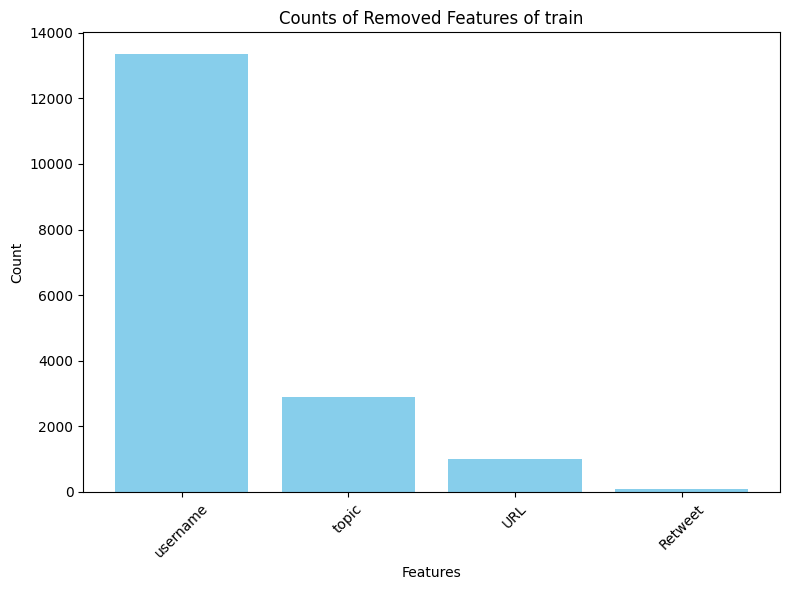

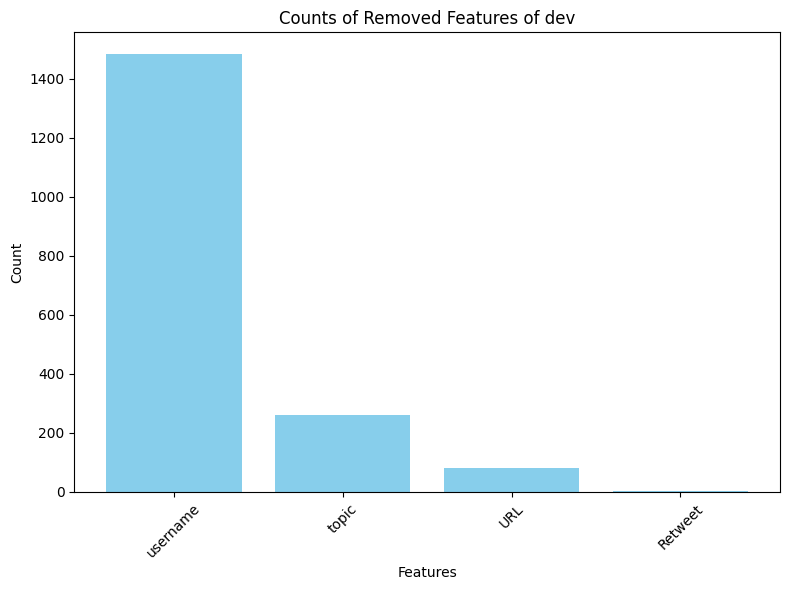

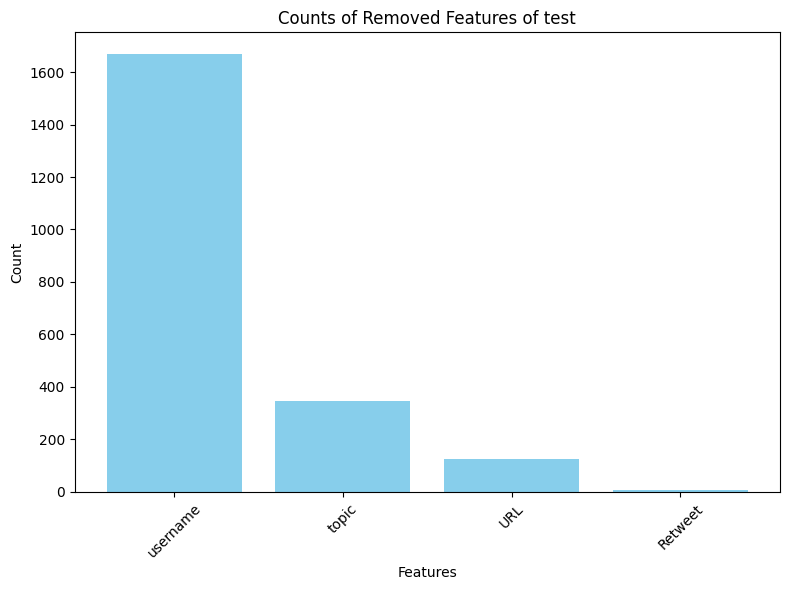

In [142]:
import matplotlib.pyplot as plt
import re
from collections import Counter

def visualize_removed_features(column_data,name):

    removed_features = []


    for text in column_data:

        mentions = re.findall(r'@[A-Za-z0-9]+', text)
        hashtags = re.findall(r'#\w+', text)
        rt_patterns = re.findall(r'RT[\s]+', text)
        urls = re.findall(r'https?:\/\/\S+', text)


        username_count = len(mentions)
        topic_count = len(hashtags)
        retweet_count = len(rt_patterns)
        url_count = len(urls)


        removed_features.extend(['username'] * username_count)
        removed_features.extend(['topic'] * topic_count)
        removed_features.extend(['Retweet'] * retweet_count)
        removed_features.extend(['URL'] * url_count)


    feature_counts = Counter(removed_features)

 
    plt.figure(figsize=(8, 6))
    plt.bar(feature_counts.keys(), feature_counts.values(), color='skyblue')
    plt.title('Counts of Removed Features of '+ name)
    plt.xlabel('Features')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.show()
    
visualize_removed_features(train['text'],'train')
visualize_removed_features(dev['text'],'dev')
visualize_removed_features(test['text'],'test')


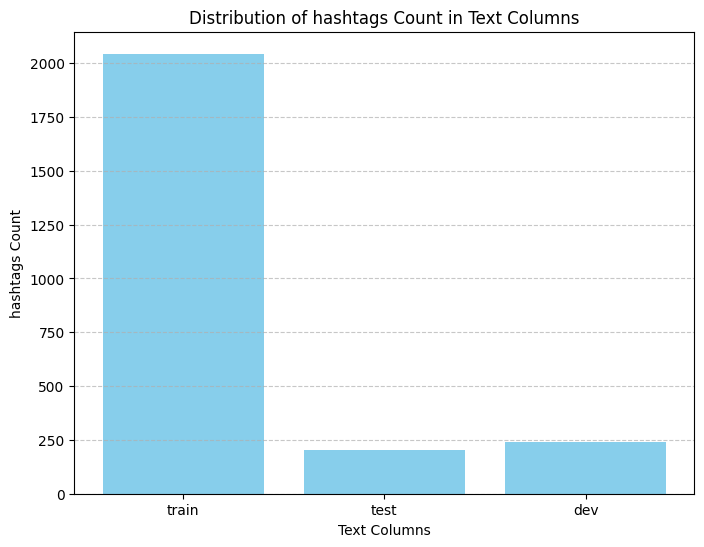

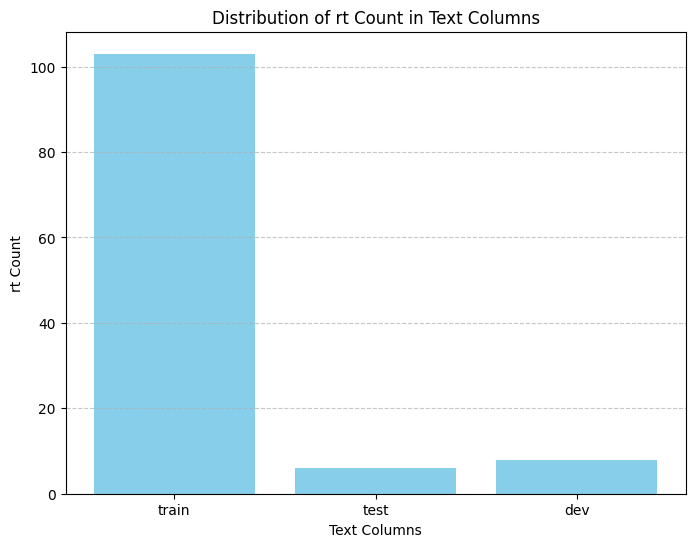

In [161]:
def count_hashtags_and_RT_in_column(column_data):
    count_hashtags = 0
    count_RT = 0

    for text in column_data:
        if '#' in text:
            count_hashtags += 1
        
        if 'RT' in text:
            count_RT += 1

    return count_hashtags, count_RT
test_hashtags,test_rt=count_hashtags_and_RT_in_column(test['text'])
dev_hashtags,dev_rt=count_hashtags_and_RT_in_column(dev['text'])
train_hashtags,train_rt=count_hashtags_and_RT_in_column(train['text'])

list_hashtags=[train_hashtags,dev_hashtags,test_hashtags]
list_rt = [train_rt,dev_rt,test_rt]

def draw(list,name):
    categories = ['train', 'test', 'dev']
    counts = list

    plt.figure(figsize=(8, 6))
    plt.bar(categories, counts, color='skyblue')
    plt.title('Distribution of '+ name+' Count in Text Columns')
    plt.xlabel('Text Columns')
    plt.ylabel(name + ' Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

draw(list_hashtags,'hashtags')
draw(list_rt,'rt')

11410
1400
1267


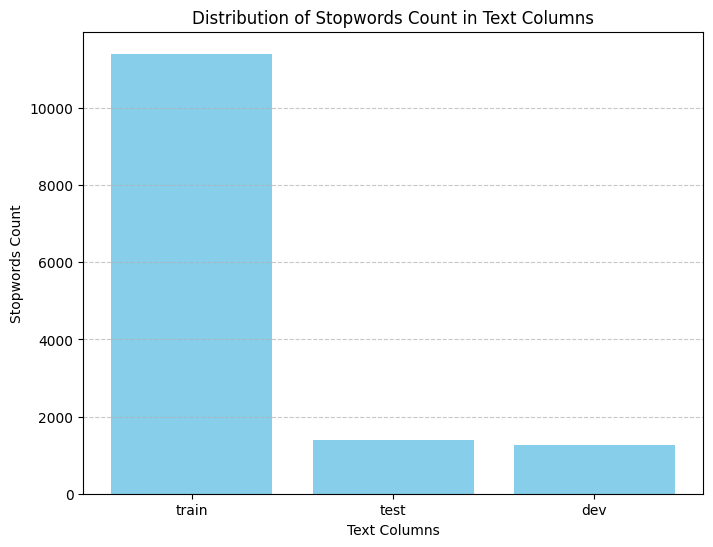

In [162]:
stop_words = set(stopwords.words('english'))

def count_stopwords_in_column(column_data):
    count_stop = 0
    for text in column_data:
        if any(word.lower() in stop_words for word in text.split()):
            count_stop += 1
    print (count_stop)
    return count_stop

def draw_stop(stopwords_count_list):
    categories = ['train', 'test', 'dev']
    counts = stopwords_count_list

    plt.figure(figsize=(8, 6))
    plt.bar(categories, counts, color='skyblue')
    plt.title('Distribution of Stopwords Count in Text Columns')
    plt.xlabel('Text Columns')
    plt.ylabel('Stopwords Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

stopwords_count_list=[count_stopwords_in_column(train['text']),
                      count_stopwords_in_column(test['text']),
                      count_stopwords_in_column(dev['text'])]
draw_stop(stopwords_count_list)


Note: So, we need to clean data such as forwards, usernames, topics, URLs, etc., because these words are meaningless for predicting sentiment.Meanwhile, there must be capital letters, events, etc. We nned to Lemmatization and Stemming

In [304]:
# download NLTK
nltk.download('punkt')
nltk.download('wordnet')

# clean up the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    return text

def preprocess_text(data):
    data['text'] = data['text'].apply(clean_text)

    stop_words = set(stopwords.words('english'))
    data['text'] = data['text'].apply(lambda x: [word for word in word_tokenize(x) if word.lower() not in stop_words])
    data['text'] = data['text'].apply(lambda x: ' '.join(x))

    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    def preprocess(text):
        stemmed_words = [stemmer.stem(word) for word in word_tokenize(text)]
        lemmatized_words = [lemmatizer.lemmatize(word) for word in word_tokenize(text)]
        corrected_text = str(TextBlob(text).correct())
        return stemmed_words, lemmatized_words, corrected_text

    print("Before TextBlob correction:")
    print(data.head())  

    data[['stemmed_words', 'lemmatized_words', 'corrected_text']] = data['text'].apply(preprocess).apply(pd.Series)

    print("After adding new columns:")
    print(data.head())

    data['text_length'] = data['text'].apply(len)
    data['special_chars_count'] = data['text'].apply(lambda x: sum(not c.isalnum() for c in x))
    data['uppercase_freq'] = data['text'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0)

    return data

# #first use
# train = preprocess_text(train)
# test = preprocess_text(test)
# sub = preprocess_text(dev)

# # Assuming train, test, and dev are your preprocessed DataFrames

# # Write 'train' DataFrame to a CSV file
# train.to_csv('clean_train.csv', index=False)  #  save the 'train' DataFrame

# # Write 'test' DataFrame to a CSV file
# test.to_csv('clean_test.csv', index=False)  # save the 'test' DataFrame 

# # Write 'dev' DataFrame to a CSV file
# dev.to_csv('clean_dev.csv', index=False)  #  save the 'dev' DataFrame 


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\li\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\li\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Note: logic of pre-process
1. Convert text to lowercase,: Remove usernames that begin with the @ symbol in the text (usually these are mentions of Twitter's users).
2. Remove the well sign (#) from the text (usually used in social media to tag topics).
3. Remove "RT" from the text, this usually indicates a Retweet.
4. Remove URL links from text as they may not contain useful information.
5. Normalise whitespace in text by replacing multiple consecutive space characters with a single space character.
6. Remove any characters in text other than letters 
7. Create a collection of English deactivated words.
8. Segment the cleaned text and filter out the deactivated words. After that, the filtered list of words is reassembled into text in the form of strings.
9. the words in the text are stemmed using Porter Stemmer and merged using WordNet Lemmatizer.
10.  Use preprocess function  for stemming, merging, and text correction ( possible spelling errors) using TextBlob.
11. New columns have been added including 'stemmed_words', 'lemmatised_words' and 'corrected_text' which contain the results of stemming, lemmatisation and text correction respectively.
12. The length of the text, the number of special characters and the frequency of capital letters were counted and added to new columns in the dataset, and the processed ones were then written to the new dataset to save time in character processing.
Besides: The main function of the annotated section is save the each cleand DataFrame to a new CSV called"clean_"

Note: Before creating a model, machines are more receptive to numbers, so converting the string to numbers using TF-IDF is beneficial. Also, for airline_sentiment, it only have three values, so just use it as 

In [194]:
train_eval = pd.read_csv('clean_train.csv')
test_eval =  pd.read_csv('clean_test.csv')
dev_eval =  pd.read_csv('clean_dev.csv')

# print (train_stacking['airline_sentiment'])
# print (test_eval['airline_sentiment'])
# print (dev_eval['airline_sentiment'])

train_eval = train_eval.dropna(subset=['text'])
dev_eval = dev_eval.dropna(subset=['text'])
test_eval = test_eval.dropna(subset=['text'])

# encode the label
label_mapping = {'positive': 2, 'negative': 0, 'neutral': 1}
train_eval['airline_sentiment'] = train_eval['airline_sentiment'].map(label_mapping)
dev_eval['airline_sentiment'] = dev_eval['airline_sentiment'].map(label_mapping)
test_eval['airline_sentiment'] = test_eval['airline_sentiment'].map(label_mapping)

# Segment features and labels
X_train = train_eval['text']
y_train = train_eval['airline_sentiment']
X_dev = dev_eval['text']
y_dev = dev_eval['airline_sentiment']
X_test = test_eval['text']
y_test = test_eval['airline_sentiment']

# Check for unique labels in the training set
unique_labels = np.unique(y_train)
print("Unique labels in y_train:", unique_labels)
missing_labels = train_eval['airline_sentiment'].isnull().sum()
print("Number of missing labels in y_train:", missing_labels)

#  feature extraction by Use TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_dev_tfidf = tfidf_vectorizer.transform(X_dev)

# weights calculated
class_weights = compute_sample_weight('balanced', y_train)


Unique labels in y_train: [0 1 2]
Number of missing labels in y_train: 0


Note:

Data preprocessing:

1. Read the dataset from the cleaned file.
Remove rows with missing values in the 'text' column using dropna().
After that encoding is done to convert sentiment labels to numeric labels.
Finally features and labels are separated. Text data is stored in X_train, X_dev and X_test; labels are stored in y_train, y_dev and y_test.

2. Label uniqueness checking and missing value counting:
Checking the unique label categories in the training set to prevent erroneous values and the number of missing values in the label columns in the training set.

3. Feature Extraction:
Feature extraction is performed on the text data using TfidfVectorizer to convert the text to TF-IDF feature representation.

4. Category weight calculation:
The category weights of the labels in the training set are calculated using compute_sample_weigh() (as mentioned earlier negative emotions are much higher than positive neutral emotions)

Now, preproceesing for the data is over.

# LogisticRegression and MultinomialNB & MLP


Note:
First Part: In this part, i use LogisticRegression and MultinomialNB to solve this project, and try to optimize the hyperparameters of Naive Bayes. With the F1 rise about 0.5%.In addation, I also use MLP. After adjustment, the hyperparameter can reach 0.76 (an increase of 1% compared with the previous adjustment)

In [201]:
# print( len(y_train))
# print( len(y_test))

# Initialise the shallow classifier(Logistic Regression & Naive Bayes)
lr = LogisticRegression(max_iter=500)
nb = MultinomialNB()

# Logistic Regression
lr.fit(X_train_tfidf, y_train, sample_weight= class_weights)
y_pred = lr.predict(X_test_tfidf)

lr_acc = accuracy_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Logistic Regression - Test Accuracy: {lr_acc}, F1 Score: {lr_f1}")


# Naive Bayes
nb.fit(X_train_tfidf, y_train, sample_weight= class_weights)
y_pred = nb.predict(X_test_tfidf)

nb_acc = accuracy_score(y_test, y_pred)
nb_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Naive Bayes - Test Accuracy: {nb_acc}, F1 Score: {nb_f1}")


Logistic Regression - Test Accuracy: 0.7470870459218643, F1 Score: 0.756999386719663
Naive Bayes - Test Accuracy: 0.7669636737491432, F1 Score: 0.7719034954307907


Note:
These two models have same logic, so i will give the details of the Naive Bayes

A naive Bayes classifier is initialized using the MultinomialNB() function.
The model is fit (trained) to the TF-IDF vectorized training data X_train_tfidf and label y_train through the fit() method, and the sample weights class_weights are applied.
Use the fitted model to predict the test set X_test_tfidf, and obtain the prediction result y_pred.
The accuracy (Accuracy) and F1 score (F1 Score) of the naive Bayes model on the test set are calculated through accuracy_score() and f1_score(), which are stored in nb_acc and nb_f1 respectively.

In [202]:
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}  

# GridSearch
grid = GridSearchCV(estimator=nb, param_grid=param_grid, scoring='f1_weighted', cv=3)
grid_result = grid.fit(X_train_tfidf, y_train, sample_weight=class_weights)

best_nb = grid_result.best_estimator_

# fit
best_nb.fit(X_train_tfidf, y_train, sample_weight=class_weights)
y_pred = best_nb.predict(X_test_tfidf)

# F1 and Accuracy
nb_acc = accuracy_score(y_test, y_pred)
nb_f1_tunning = f1_score(y_test, y_pred, average='weighted')
print(f"Naive Bayes - Test Accuracy: {nb_acc}, F1 Score: {nb_f1_tunning}")

Naive Bayes - Test Accuracy: 0.7731322823851954, F1 Score: 0.776957817766477


Note:
For Naive Bayes parameter adjustment, only need to pay attention to alpha (smoothing parameter), which is used to deal with feature categories that have not appeared in the training data.

In [197]:

def create_deep_nn_model(optimizer='adam', dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train_tfidf.shape[1]))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# f1
f1_scorer = make_scorer(f1_score, average='weighted')

nn_model = KerasClassifier(model=create_deep_nn_model, epochs=10, batch_size=32, verbose=0)
nn_model.fit(X_train_tfidf, y_train, sample_weight=class_weights)

KerasClassifier(
	model=<function create_deep_nn_model at 0x0000021C9FBFA5F0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

Note:

1. Build the model: Use the Keras Sequential API to build a neural network model that includes an input layer, two hidden layers, and an output layer. Specifically:

2. The input layer is a Dense (fully connected) layer with input dimension X_train_tfidf.shape[1] (5000).
128 is the number of units in the first hidden layer, and the activation function is ReLU.

3. Dropout(dropout_rate) adds a DropOut layer to prevent overfitting, dropout_rate is the specified dropout ratio.
64 is the number of units in the second hidden layer, also using the ReLU activation function.

4. The output layer has 3 units, uses a softmax activation function, and is suitable for multi-classification problems (three emotions in this case).
Compiled using Adam optimizer and sparse categorical cross-entropy loss function.

5. f1_scorer function: This is a custom scoring function that uses f1_score for weighted calculations. The evaluation metric average='weighted' means a weighted average of the F1 scores of each category, and the weight is the support of each category.

6. Model training: Use KerasClassifier to encapsulate the constructed neural network model. epochs=10 is the number of epochs during training, and batch_size=32 is each specified batch.

The last line of code is to train the neural network model, using the training set and corresponding labels and passing the sample weights.

In [198]:
y_pred = nn_model.predict(X_test_tfidf)
nn_acc = accuracy_score(y_test, y_pred)
nn_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Multi-Layer Perception - Test Accuracy: {nn_acc}, F1 Score: {nn_f1}")

Multi-Layer Perception - Test Accuracy: 0.7573680603152845, F1 Score: 0.7585759974002212


In [200]:
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'batch_size': [32, 64, 128, 256],
    'epochs': [1, 5, 10, 20, 30, 50],
}

from sklearn.utils.class_weight import compute_sample_weight

# GridSearch
grid = GridSearchCV(estimator=nn_model, param_grid=param_grid, scoring=f1_scorer, cv=3, verbose=3, error_score='raise')
grid_result = grid.fit(X_dev_tfidf, y_dev, sample_weight=compute_sample_weight('balanced', y_dev))

print("Best parameters found:")
print(grid_result.best_params_)
best_model = grid_result.best_estimator_ 

#fit model
best_model.fit(X_train_tfidf, y_train,compute_sample_weight('balanced', y_train))

y_pred = best_model.predict(X_test_tfidf)

#accuracy and f1
nn_acc = accuracy_score(y_test, y_pred)
nn_f1_tunning = f1_score(y_test, y_pred, average='weighted')
print(f"Multi-Layer Perception - Test Accuracy: {nn_acc}, F1 Score: {nn_f1_tunning}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END batch_size=32, epochs=1, optimizer=adam;, score=0.664 total time=   0.5s
[CV 2/3] END batch_size=32, epochs=1, optimizer=adam;, score=0.665 total time=   0.5s
[CV 3/3] END batch_size=32, epochs=1, optimizer=adam;, score=0.587 total time=   0.5s
[CV 1/3] END batch_size=32, epochs=1, optimizer=rmsprop;, score=0.631 total time=   0.5s
[CV 2/3] END batch_size=32, epochs=1, optimizer=rmsprop;, score=0.511 total time=   0.5s
[CV 3/3] END batch_size=32, epochs=1, optimizer=rmsprop;, score=0.622 total time=   0.5s
[CV 1/3] END batch_size=32, epochs=5, optimizer=adam;, score=0.721 total time=   0.7s
[CV 2/3] END batch_size=32, epochs=5, optimizer=adam;, score=0.705 total time=   0.7s
[CV 3/3] END batch_size=32, epochs=5, optimizer=adam;, score=0.694 total time=   0.7s
[CV 1/3] END batch_size=32, epochs=5, optimizer=rmsprop;, score=0.718 total time=   0.7s
[CV 2/3] END batch_size=32, epochs=5, optimizer=rmsprop;, score=0.

Note: 
general logical of GridSearch

compute_sample_weight('balanced', y_train) is a function used to calculate the weight of a sample. Its function is to weight the sample according to the specified method. In this function, the parameter 'balanced' indicates that the sample weight is calculated in a "balanced" way.

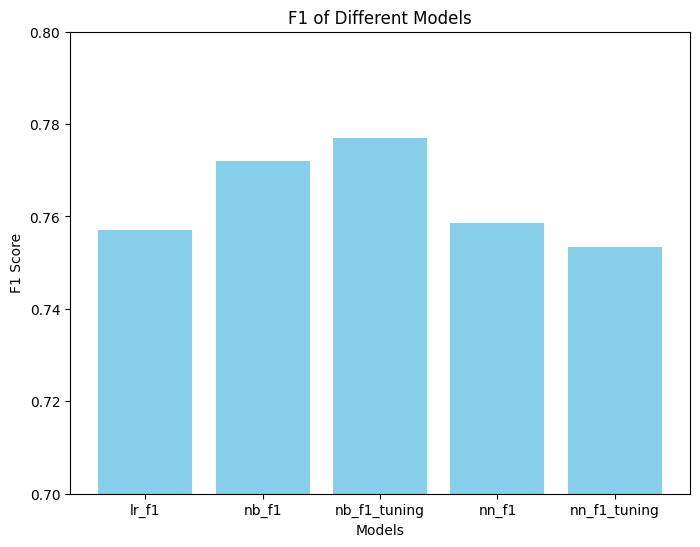

In [205]:
names = ['lr_f1', 'nb_f1', 'nb_f1_tuning', 'nn_f1', 'nn_f1_tuning']

plt.figure(figsize=(8, 6))
plt.bar(names, [lr_f1, nb_f1, nb_f1_tunning, nn_f1, nn_f1_tunning], color='skyblue')
plt.title('F1 of Different Models')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.ylim(0.7, 0.8)  
plt.show()

Summary: Each model is different but the performance is not good enough (tuning refers to after parameter adjustment). So, consider use XgBoost

# XgBoost 

Note:
Second Part: In this part, i use XgBoost to solve this project, and try to optimize the hyperparameters of Xgboost. With the F1 rise about 4%.

In [206]:
train_xgboost = pd.read_csv('clean_train.csv')
test_xgboost =  pd.read_csv('clean_test.csv')
dev_xgboost =  pd.read_csv('clean_dev.csv')

# print (train_stacking['airline_sentiment'])
# print (test_xgboost['airline_sentiment'])
# print (dev_xgboost['airline_sentiment'])

train_xgboost = train_xgboost.dropna(subset=['text'])
dev_xgboost = dev_xgboost.dropna(subset=['text'])
test_xgboost = test_xgboost.dropna(subset=['text'])

# Encode labels
label_mapping = {'positive': 2, 'negative': 0, 'neutral': 1}
train_xgboost['airline_sentiment'] = train_xgboost['airline_sentiment'].map(label_mapping)
dev_xgboost['airline_sentiment'] = dev_xgboost['airline_sentiment'].map(label_mapping)

# Split features and labels
X_train = train_xgboost['text']
y_train = train_xgboost['airline_sentiment']
X_dev = dev_xgboost['text']
y_dev = dev_xgboost['airline_sentiment']

# check unique categories in the training set
unique_labels = np.unique(y_train)
print("Unique labels in y_train:", unique_labels)
missing_labels = train_xgboost['airline_sentiment'].isnull().sum()
print("Number of missing labels in y_train:", missing_labels)

# Category weights
class_weights = compute_sample_weight('balanced', y_train)

# feature extraction using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_dev_tfidf = tfidf_vectorizer.transform(X_dev)

# XGBoost
xgb_clf = XGBClassifier(objective='multi:softmax', num_class=3)
print("start train")
xgb_clf.fit(X_train_tfidf, y_train, sample_weight=class_weights)

Unique labels in y_train: [0 1 2]
Number of missing labels in y_train: 0
start train


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

Note: This part can be divided into four parts 

1. data preparation:

Read cleaned datasets.
Remove rows with missing values.
Encode the labels so that the sentiment label "positive" is mapped to 2, "negative" is mapped to 0, and "neutral" is mapped to 1.
Finally split features (X) and labels (y)

2. Feature engineering:

Use TfidfVectorizer to extract features from the text and convert the text into a TF-IDF (Term Frequency-Inverse Document Frequency) feature vector. The word frequency matrix is limited to a maximum of 5000 features.

3. Model building:

An XGBoost classifier (XGBClassifier) is initialized.
Use the fit function to train this classifier. During the training process, the sample weight calculated by compute_sample_weight is also passed using the sample_weight parameter to cope with the class imbalance in the training set.

In [207]:
#predict
predictions_xgboost = xgb_clf.predict(X_test_tfidf)
print(predictions_xgboost)

#encode
y_test=test_xgboost['airline_sentiment']
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# f1
f1_xgboost = f1_score(y_test_encoded, predictions_xgboost, average='weighted')
print("F1 Score:", f1_xgboost)
accuracy = accuracy_score(y_test_encoded, predictions_xgboost)
print("Accuracy:", accuracy)

[1 0 2 ... 2 2 0]
F1 Score: 0.7240210430658516
Accuracy: 0.7107607950651131


Note:
same progress of predict and evaluate
However, the real emotion labels need to be converted into numerical encoding, and LabelEncoder is used for label encoding to calculate the F1 score and accuracy of the prediction results.

In [209]:

param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [8, 10, 12],
    'n_estimators': [600 ,800,1000]
}

from sklearn.metrics import make_scorer, f1_score

# f1 with weighted
weighted_f1 = make_scorer(f1_score, average='weighted')


print("start grid search")
# GridSearchCV
#grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring=weighted_f1, verbose=2)
grid_search = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_grid, cv=3, scoring=weighted_f1, verbose=2)

grid_search.fit(X_train_tfidf, y_train, sample_weight=class_weights)


print("Best parameters:", grid_search.best_params_)

# Best model
best_model_dev = grid_search.best_estimator_


start grid search
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .learning_rate=0.2, max_depth=10, n_estimators=1000; total time=  30.0s
[CV] END .learning_rate=0.2, max_depth=10, n_estimators=1000; total time=  24.0s
[CV] END .learning_rate=0.2, max_depth=10, n_estimators=1000; total time=  46.9s
[CV] END ..learning_rate=0.3, max_depth=8, n_estimators=1000; total time=  16.3s
[CV] END ..learning_rate=0.3, max_depth=8, n_estimators=1000; total time=  15.0s
[CV] END ..learning_rate=0.3, max_depth=8, n_estimators=1000; total time=  15.4s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=800; total time=  15.0s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=800; total time=  15.1s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=800; total time=  15.4s
[CV] END ..learning_rate=0.2, max_depth=8, n_estimators=1000; total time=  17.2s
[CV] END ..learning_rate=0.2, max_depth=8, n_estimators=1000; total time=  16.4s
[CV] END ..learning_rate=0.2, 

Note: 
Due to the long running time, I just used GridSearch to determine the range of the best parameters, then changed the parameter list to a range around the best parameters and changed the search method to RandomSearch to save time
Candidate values for hyperparameters are defined in param_grid, including learning rate, max_depth and n_estimators.


In [211]:

# predict
predictions = best_model_dev.predict(X_test_tfidf)
y_test=test_xgboost['airline_sentiment']
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# f1
f1_xgboost_tunning = f1_score(y_test_encoded, predictions, average='weighted')
print("F1 Score:", f1_xgboost_tunning)
accuracy = accuracy_score(y_test_encoded, predictions)
print("Accuracy:", accuracy)


F1 Score: 0.7542955264193203
Accuracy: 0.748457847840987


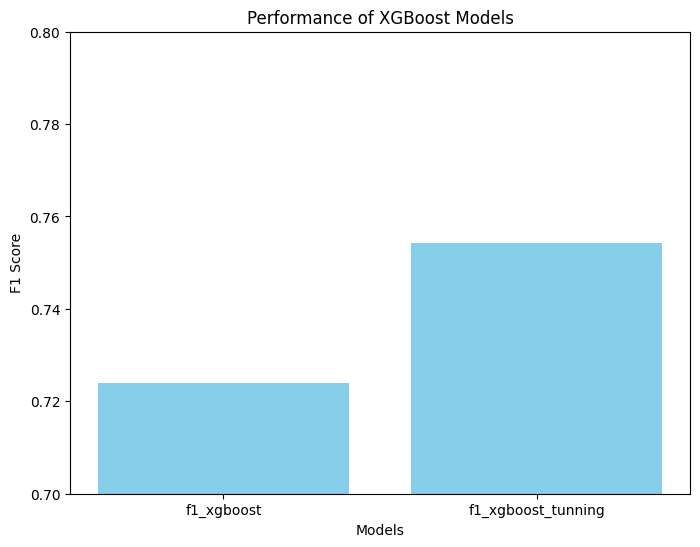

In [212]:

names = ['f1_xgboost', 'f1_xgboost_tunning']


plt.figure(figsize=(8, 6))
plt.bar(names, [f1_xgboost, f1_xgboost_tunning], color='skyblue')
plt.title('Performance of XGBoost Models')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.ylim(0.7, 0.8)  
plt.show()

Note: Obviously, Not very good compared to other models, So how does stacking perform?

In [65]:
import torch
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print('++++++++++++++++++++++')
    print("GPU")
    print('++++++++++++++++++++++')
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")
# device = torch.device("cpu")
print ("Using {} device".format(device))

++++++++++++++++++++++
GPU
++++++++++++++++++++++
Using cuda:0 device


try to use gpu but failed.

# Stacking (final: 'LogisticRegression'. base: 'naive_bayes','svm', 'gradient_boosting') 

Note:
Initially, I intended to stack CNNs with random forest models and subsequently stack them with other base classifiers, followed by fine-tuning. However, I found this approach too convoluted, so I divided it into two parts. First, I utilized random forests and fine-tuned them. Second, I stacked the well-tuned random forest model with other classifiers and fine-tuned the ensemble. As a result, much of the subsequent code has been commented out. I hope for your understanding.

In [213]:
# Load your datasets
train_stacking = pd.read_csv('clean_train.csv')
test_stacking = pd.read_csv('clean_test.csv')
dev_stacking = pd.read_csv('clean_dev.csv')

# Encoding labels
label_encoder = LabelEncoder()
train_stacking['airline_sentiment'] = label_encoder.fit_transform(train_stacking['airline_sentiment'])
dev_stacking['airline_sentiment'] = label_encoder.fit_transform(dev_stacking['airline_sentiment'])

train_stacking['text'].fillna('', inplace=True)
test_stacking['text'].fillna('', inplace=True)
dev_stacking['text'].fillna('', inplace=True)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(train_stacking['text'])
y_train = train_stacking['airline_sentiment']
X_test = tfidf.transform(test_stacking['text'])
y_test = label_encoder.transform(test_stacking['airline_sentiment'])
X_dev = tfidf.fit_transform(dev_stacking['text'])
y_dev = dev_stacking['airline_sentiment']

# Scale the TF-IDF features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_dev_scaled = scaler.fit_transform(X_dev)

# Ensemble Learning - Random Forest
unique_classes = np.unique(train_stacking['airline_sentiment'])
class_weights = compute_class_weight('balanced', classes=unique_classes, y=train_stacking['airline_sentiment'])



Note:
same preprocessing, but use StandScaler to ensure scale consistency between different features

Reasons: 

Avoid negative impacts caused by differences in feature scales. For example, those features with a larger value range may have a greater impact on the training of the model and thus affect the model performance.

Ensure model convergence and performance: The normalization (scaling) operation ensures that features have a mean of 0 and a variance of 1, which helps the model converge faster and generally improves the performance of the model. Especially for models that need to be optimized through algorithms such as gradient descent (used below), features with similar scales can make the optimization process smoother and more efficient.

In [34]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=dict(enumerate(class_weights)))
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)
print("Random Forest F1_score:", f1_score(y_test, rf_preds, average = 'weighted'))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

# # CNN Model
# max_words = 5000
# tokenizer = Tokenizer(num_words=max_words)
# tokenizer.fit_on_texts(train_stacking['text'])
# sequences_train = tokenizer.texts_to_sequences(train_stacking['text'])
# sequences_test = tokenizer.texts_to_sequences(test_stacking['text'])
# word_index = tokenizer.word_index
# X_train_pad = pad_sequences(sequences_train, maxlen=max_words)
# X_test_pad = pad_sequences(sequences_test, maxlen=max_words)

# cnn_model = Sequential()
# cnn_model.add(Embedding(len(word_index) + 1, 100, input_length=max_words))
# cnn_model.add(Conv1D(64, 5, activation='relu'))
# cnn_model.add(GlobalMaxPooling1D())
# cnn_model.add(Dense(len(unique_classes), activation='softmax'))

# cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# print("Start fitting CNN cnn_model")
# # Train CNN cnn_model
# cnn_model.fit(X_train_pad, train_stacking['airline_sentiment'], epochs=5, batch_size=32, validation_split=0.2)

# # Evaluate CNN cnn_model on test data
# cnn_probs = cnn_model.predict(X_test_pad)
# cnn_preds = np.argmax(cnn_probs, axis=1)
# print("CNN Accuracy:", accuracy_score(y_test, cnn_preds))
# print("CNN Classification Report:")
# print(classification_report(y_test, cnn_preds))

Random Forest F1_score: 0.7421645637963002
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       918
           1       0.59      0.46      0.52       310
           2       0.65      0.60      0.62       236

    accuracy                           0.75      1464
   macro avg       0.68      0.65      0.66      1464
weighted avg       0.74      0.75      0.74      1464



In [41]:

param_grid_rf = {
    'n_estimators': [450,500,550],
    'max_depth': [None, 5, 10],
    'min_samples_split': [3 ,5, 10,50],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False], 
    'criterion': ['gini', 'entropy'] 
}
from sklearn.model_selection import RandomizedSearchCV

#GridSearchCV
grid_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, n_iter=5, cv=5, verbose=1, scoring='f1_weighted')
print("USER REPORT-------Start fit rf")
grid_search_rf.fit(X_train_scaled, y_train)
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)



USER REPORT-------Start fit rf
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters for Random Forest: {'n_estimators': 450, 'min_samples_split': 50, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}


In [42]:
print("Best Score (F1 weighted) for Random Forest:",  f1_score(y_test, grid_search_rf.predict(X_test_scaled), average = 'weighted'))

Best Score (F1 weighted) for Random Forest: 0.7700022582252867


In [43]:

best_rf = grid_search_rf.best_estimator_
# 使用最佳参数的模型进行预测
# rf_preds_tuned = best_rf.predict(X_test)
# print("Tuned Random Forest F1 Score:", f1_score(y_test, rf_preds_tuned, average='weighted'))
# print("Tuned Random Forest Classification Report:")
# print(classification_report(y_test, rf_preds_tuned))

Note:
randomforest and its optimising, use the dev dataset for optimising as per requirement

In [349]:
# max_words = 5000
# tokenizer = Tokenizer(num_words=max_words)
# tokenizer.fit_on_texts(train_stacking['text'])
# sequences_train = tokenizer.texts_to_sequences(train_stacking['text'])
# sequences_test = tokenizer.texts_to_sequences(test_stacking['text'])
# word_index = tokenizer.word_index
# X_train_pad = pad_sequences(sequences_train, maxlen=max_words)
# X_test_pad = pad_sequences(sequences_test, maxlen=max_words)

In [ ]:
# from sklearn.ensemble import  VotingClassifier
# from scikeras.wrappers import KerasClassifier


# # Function to create the Keras model architecture
# def create_cnn_model():

#     cnn_model = Sequential()
#     cnn_model.add(Embedding(len(word_index) + 1, 100, input_length=max_words))
#     cnn_model.add(Conv1D(64, 5, activation='relu'))
#     cnn_model.add(GlobalMaxPooling1D())
#     cnn_model.add(Dense(len(unique_classes), activation='softmax'))
#     cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     print("Start fitting CNN model")
#     cnn_model.fit(X_train_pad, train_stacking['airline_sentiment'], epochs=5, batch_size=32, validation_split=0.2)
#     return cnn_model
# temp = create_cnn_model()
# # Wrap the Keras model creation function in KerasClassifier
# #only when modle = create_cnn_model function, it works with long running time(for it will call this function every time)
# keras_wrapped_model = KerasClassifier(model=create_cnn_model, epochs=10)

# # Create the VotingClassifier with the Keras CNN model and other estimators
# voting_classifier = VotingClassifier(
#     estimators=[('cnn', keras_wrapped_model), ('random_forest', grid_search_rf.best_estimator_)],
#     voting='soft'  # Use 'soft' voting for the Keras model
# )

In [ ]:
# # Fit the VotingClassifier on the training data
# voting_classifier.fit(X_train_scaled, y_train)
# stacked_model=voting_classifier

In [344]:
# pred=stacked_model.predict(X_test_scaled)

# f1 = f1_score(y_test, pred, average='weighted')
# print("Stacked Model F1 Score:", f1)

46/46 [==============================] - 1s 24ms/step
Stacked Model F1 Score: 0.7222790377620645


Note:
previous result method which stack cnn with randomforest ↑ Besids, still one question i notice , the code below only when modle = create_cnn_model function, it works with long running time(for it will call this function every time)
'keras_wrapped_model = KerasClassifier(model=create_cnn_model, epochs=10)'
but it will be called and fit a new cnn model everytime when want to use the combained model. 

In [46]:
# Stacking Classifier
base_classifiers = [
    ('naive_bayes', MultinomialNB(alpha=1.0, class_prior=class_weights)),
    ('svm', SVC(kernel='linear', probability=True, class_weight=dict(enumerate(class_weights)))),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
]

stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression())
stacking_classifier.fit(X_train_scaled, y_train)

stacking_preds = stacking_classifier.predict(X_test_scaled)
print("Stacking Classifier Classification Report:")
print(classification_report(y_test, stacking_preds))


Stacking Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       918
           1       0.63      0.48      0.54       310
           2       0.74      0.61      0.67       236

    accuracy                           0.77      1464
   macro avg       0.73      0.67      0.69      1464
weighted avg       0.76      0.77      0.76      1464



Note: 
Created a stacking classifier stacking_classifier, passed in the defined base classifier list base_classifiers, and set the final_estimator to logistic regression (LogisticRegression) to integrate the prediction results of the primary classifier.

In [47]:
f1 = f1_score(y_test, stacking_preds, average='weighted')
print("Stacking Classifier F1 Score:", f1)

Stacking Classifier F1 Score: 0.7625406722187982


In [51]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0]
}
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
param_grids_stack = {
    'naive_bayes': param_grid_nb,
    'svm': param_grid_svm,
    'gradient_boosting': param_grid_gb
}


In [52]:
# Model hyperparameter tuning
best_models = {}

#best_models['stacked_model'] = stacked_model
for classifier_name, classifier in base_classifiers:
    
    #if classifier_name == 'stacked_model':
        #continue

    print(f"Grid Search for {classifier_name}...")
    
    param_grid = param_grids_stack.get(classifier_name, {})  # Get the parameter grid for the classifier
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='f1_weighted', verbose=2)
    print("USER REPORT-------Start fit "+classifier_name)
    grid_search.fit(X_dev_scaled, y_dev)
    best_params = grid_search.best_params_
    
    best_model = type(classifier)(**best_params) if best_params else classifier
    best_model.fit(X_dev_scaled, y_dev)
    best_models[classifier_name] = best_model

    # Evaluate on the whole training set
    train_preds = best_model.predict(X_dev_scaled)
    f1_train = f1_score(y_dev, train_preds, average='weighted')
    print(f"{classifier_name} - Training F1 Score: {f1_train}")


Grid Search for naive_bayes...
USER REPORT-------Start fit naive_bayes
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=1.

Note:
logic of this code:

1. Loop through each classifier:

2. A grid search was performed for each classifier followed by evaluation using cross-validation (using the weighted F1 score as the evaluation metric)

3. After finding the best parameters, use these best parameters to initialize a new best model. Use the entire dev set (X_dev_scaled and y_dev) for training. The best model performance is then evaluated: by calculating the weighted F1 score.

4. Finally store each best model in the best_models dictionary

In [71]:

# Stacking Classifier with tuned hyperparameters
stacking_classifiers = [(name, model) for name, model in best_models.items()]
stacking_classifiers.append(('best_rf', best_rf))
for name, model in stacking_classifiers:
    print(f"Name: {name}, Model: {model}")

Name: naive_bayes, Model: MultinomialNB(alpha=0.1)
Name: svm, Model: SVC(C=0.1, kernel='linear')
Name: gradient_boosting, Model: GradientBoostingClassifier(learning_rate=0.2, n_estimators=150)
Name: best_rf, Model: RandomForestClassifier(class_weight={0: 0.5317011927181419,
                                     1: 1.5747675962815404,
                                     2: 2.0651340996168583},
                       max_features='log2', min_samples_split=50,
                       n_estimators=450, random_state=42)


Note:
radom forest model has already been optimized, so just put it in stacking_classifiers, reduce training stress

In [82]:
# Category weights
class_weights = compute_sample_weight('balanced', y_train)
# Initialise the shallow classifier(Logistic Regression & Naive Bayes)
lr = LogisticRegression(max_iter=1000)

# Logistic Regression
lr.fit(X_train_scaled, y_train, sample_weight= class_weights)

y_pred = lr.predict(X_test_scaled)

lr_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Logistic Regression -  F1 Score: {lr_f1}")



Logistic Regression -  F1 Score: 0.6806540910766501


Note:
create a LogisticRegression mode used  for final classify 

In [128]:

param_grid_lr = {
    'C': [0.001,0.005, 0.01, 0.1],
    'solver': ['liblinear', 'lbfgs','saga'],
    'max_iter': [10, 25, 50, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'tol': [0.0001, 0.00001, 0.000001],
}
class_weights_dev = compute_sample_weight('balanced', y_dev)
# GridSearchCV 
grid = GridSearchCV(estimator=lr, param_grid=param_grid_lr, scoring='f1_weighted', cv=15, verbose=2, n_jobs=-1)

fit_params = {'sample_weight': class_weights_dev}

grid_result = grid.fit(X_dev_scaled, y_dev,  **fit_params)

best_model_lr = grid_result.best_estimator_

Fitting 15 folds for each of 576 candidates, totalling 8640 fits


c:\Users\li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3600 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklea

In [129]:
print("Best parameters found for Logistic Regression:")
print(grid_result.best_params_)
print("Best F1 score found:", grid_result.best_score_)

Best parameters found for Logistic Regression:
{'C': 0.1, 'max_iter': 10, 'penalty': 'l1', 'solver': 'saga', 'tol': 1e-06}
Best F1 score found: 0.7066110729174018


Note:
grid search for LogisticRegression,same progress, just use the grid search for without any complex params.For the error before, its simply  because these two parameters cannot be matched together, i use grid search here which will not miss any possible combination.

In [130]:
from sklearn.metrics import f1_score

print("\nFitting Stacking Classifier with Tuned Hyperparameters...")
stacking_classifier = StackingClassifier(estimators=stacking_classifiers, final_estimator=best_model_lr)


# fit
stacking_classifier.fit(X_train_scaled, y_train)

# Predict
stacking_test_predictions = stacking_classifier.predict(X_test_scaled)


Fitting Stacking Classifier with Tuned Hyperparameters...


c:\Users\li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [131]:
#stacking_test_predictions = stacking_classifier.predict(X_dev_scaled)
f1_stacking_test = f1_score(y_test, stacking_test_predictions, average='weighted')
print(f"Stacking Classifier - Validation F1 Score: {f1_stacking_test}")

Stacking Classifier - Validation F1 Score: 0.7856431828583501


Note:
create a new stacking model which has apparent improve 2%

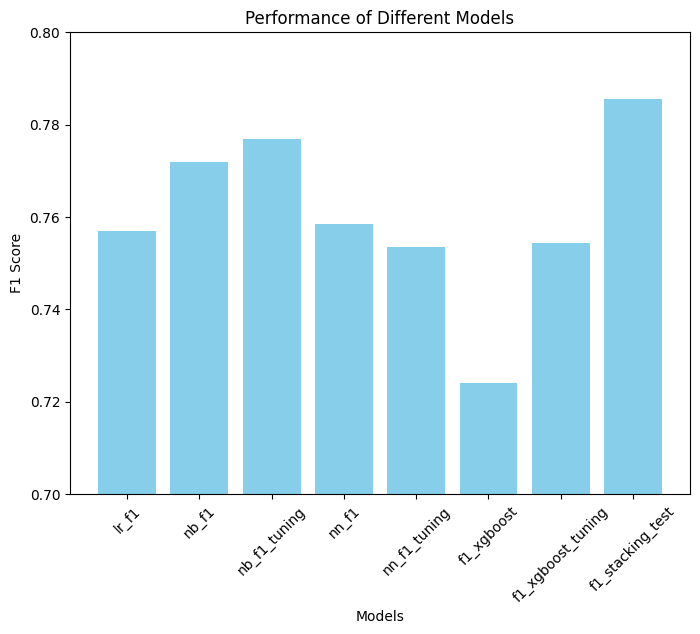

In [215]:
import matplotlib.pyplot as plt

names = ['lr_f1', 'nb_f1', 'nb_f1_tuning', 'nn_f1', 'nn_f1_tuning', 'f1_xgboost', 'f1_xgboost_tuning','f1_stacking_test']

plt.figure(figsize=(8, 6))
plt.bar(names, [lr_f1, nb_f1, nb_f1_tunning, nn_f1, nn_f1_tunning, f1_xgboost, f1_xgboost_tunning, f1_stacking_test], color='skyblue')
plt.title('Performance of Different Models')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.ylim(0.7, 0.8)  
plt.xticks(rotation=45)
plt.show()


Therefore, overall, stacking has the best effect.

Why Stacking is the best:

1. Improve prediction performance: Stacked models can improve prediction performance to a certain extent by integrating the prediction results of multiple base models. By combining the advantages of different models, the shortcomings of each model are compensated, thereby improving the overall prediction accuracy.

2. Reduce the risk of overfitting: Stacking models can reduce the risk of overfitting by combining predictions from multiple models. When different models produce different biases, stacking can balance these biases and improve the model's generalization ability.

3. Good for complex problems: Stacked models often perform better when dealing with complex problems. Because of its ability to leverage a combination of multiple models, it can better capture complex patterns and features in the data.

4. Flexibility and interpretability: Stacked models are often more flexible and interpretable than a single complex model. Because the stacked model is composed of multiple base models, different base models can be selected according to specific situations, and it is easier to understand the contributions of different models.

5. Adapt to different problems: Stacked models are suitable for various types of problems, including classification, regression and other tasks. It is highly versatile and can be applied to a variety of machine learning problems.

# Summary:
## To this project:

Data Cleaning and Preprocessing: The raw data contains a significant amount of noise, abbreviations, spelling errors, and special characters. Before initiating modeling, it's crucial to appropriately clean and preprocess the text. This involves tasks like removing stopwords, stemming, tokenization, handling abbreviations, spelling correction, and more.

Feature Engineering: Twitter text needs to be transformed into numerical features understandable by computers. Techniques such as bag-of-words model, TF-IDF, word embeddings (such as Word2Vec, GloVe), etc., are widely used to convert text into numerical features.

Model Selection and Evaluation: To choose the right model, it's necessary to experiment with various algorithms such as Naive Bayes, Logistic Regression, Support Vector Machines, Deep Learning (e.g., Recurrent Neural Networks or Convolutional Neural Networks).

Hyperparameter Tuning: Optimizing model hyperparameters using techniques like grid search, random search, etc., enhances the model's performance and finds the best combination for improved predictive outcomes.

Addressing Class Imbalance: In this case, there is a significant disparity in the quantity of positive, negative, and neutral samples. This issue was handled by adjusting the weights of the classes to tackle it effectively.
